<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 10 </b></center>
<pre>    
Name:- Nisarg Kaneriya
Enrollment No.:- 22010101086

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons,make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage,dendrogram

# Step 2: Generate dummy data using make_blobs

In [7]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=300, random_state=42)
x = StandardScaler().fit_transform(x)

x

array([[-1.17252292e+00, -1.37037478e+00],
       [-1.25431875e+00, -1.30020394e+00],
       [-1.97125297e-02,  9.70729957e-01],
       [ 1.22620543e+00,  2.58674669e-01],
       [-1.49451639e+00, -1.39423947e+00],
       [ 1.44552434e+00,  6.88460734e-02],
       [-1.52152220e-01,  1.21295731e+00],
       [ 1.35482073e+00,  7.95054866e-03],
       [-2.85201970e-01,  1.12684758e+00],
       [-4.30442823e-01,  1.25386282e+00],
       [-3.10192808e-01,  1.43419168e+00],
       [ 1.34341650e+00, -1.15320250e-02],
       [-1.44874635e-01,  8.59306522e-01],
       [-4.76141995e-01,  1.09140897e+00],
       [-1.21153538e+00, -1.31567263e+00],
       [-3.30658767e-01,  1.10543189e+00],
       [-1.41077697e+00, -1.23495683e+00],
       [ 8.57568372e-01,  1.21086054e-01],
       [-1.67673727e-01,  1.30092975e+00],
       [-6.77817519e-02,  1.48519269e+00],
       [ 4.88259900e-02,  1.03107884e+00],
       [-2.20367673e-01,  1.21578253e+00],
       [ 1.46948068e+00,  7.07886971e-02],
       [-1.

# Step 3: Plot Generated data 

C:\Users\hetvi\AppData\Local\Temp\ipykernel_2732\2797659502.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],s=5,cmap='viridis',)


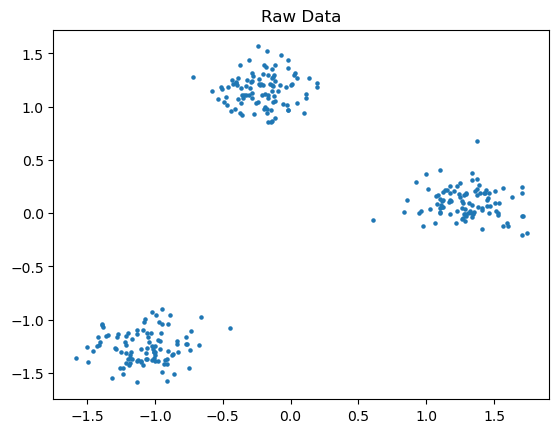

In [9]:
plt.figure(figure=(6,6))
plt.scatter(x[:,0],x[:,1],s=5,cmap='viridis',)
plt.title("Raw Data")
plt.show()

# Step 4: Apply Hierarchical Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
clustring = AgglomerativeClustering(n_clusters=4).fit(x)
labels = clustring.labels_

In [19]:
df = pd.DataFrame(x)
df['Clusters'] = labels

In [21]:
df

,0,1,Clusters
0,-1.172523,-1.370375,0
1,-1.254319,-1.300204,0
2,-0.019713,0.970730,2
3,1.226205,0.258675,1
4,-1.494516,-1.394239,0
...,...,...,...
295,-0.422221,1.211507,2
296,1.101526,0.008485,1
297,-0.515324,1.182692,2
298,-1.075078,-0.989383,0


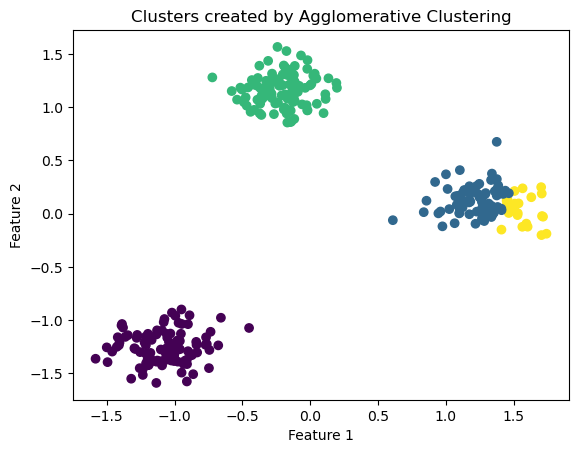

In [27]:
plt.scatter(df[0], df[1], c=df['Clusters'], cmap='viridis')
plt.title('Clusters created by Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 5: Display Dendrogram

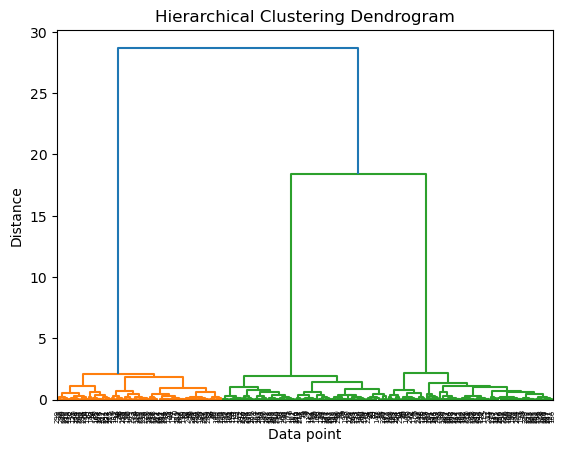

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(x, 'ward') 

dendrogram(Z) 

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

# Step 6: Generate dummy data using make_moons

In [55]:
a, b = make_moons(n_samples=400, noise=0, shuffle=True, random_state=0)
labels = np.resize(b, a.shape[0])

# Step 7: Plot Generated data

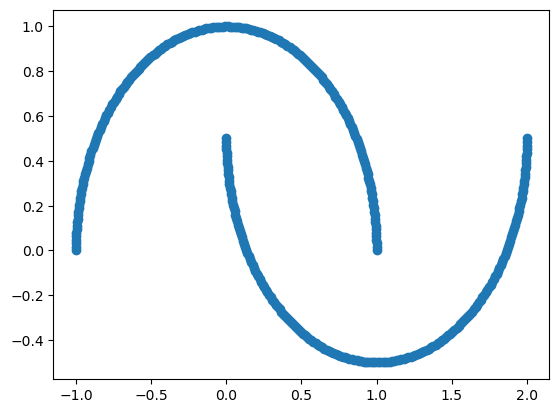

In [63]:

plt.scatter(a[:, 0], a[:, 1],)

plt.show()

# Step 8: apply DBSCAN Clustering 

In [65]:
cluster = DBSCAN(eps=.3,min_samples=3).fit(x)

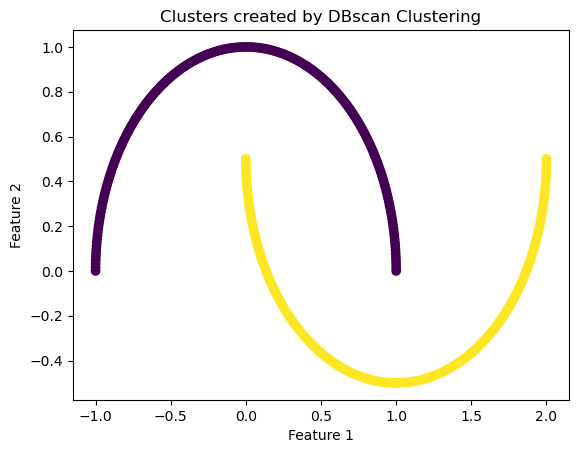

In [67]:
df = pd.DataFrame(x)
df['Cluster'] = cluster.labels_

plt.scatter(df[0], df[1], c=df['Cluster'], cmap='viridis')
plt.title('Clusters created by DBscan Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 9: apply K Mean Clustering on same data

C:\Users\hetvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


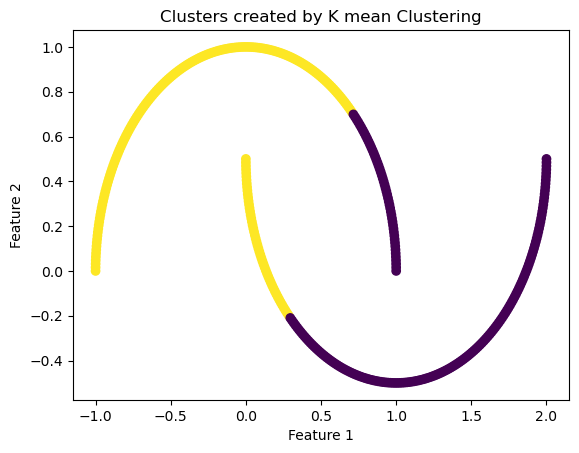

In [69]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=2).fit(x)
df['K-means'] = Kmeans.labels_

plt.scatter(df[0], df[1], c=df['K-means'], cmap='viridis')
plt.title('Clusters created by K mean Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Mall Customers Segmentation using DBSCAN

### Perform Following steps on Dataset for  customer segmentation
-> Load & Explore the Dataset <br>
-> Data Preprocessing <br>
-> Apply DBSCAN <br>
-> Visualizing Customer Segments <br>
-> Outliers (high-spending VIP customers or unusual shoppers <br>

In [71]:
customers = pd.read_csv('Mall_Customers.csv')
customers = customers.drop(['CustomerID'], axis=1)
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [73]:
X = customers.iloc[:,[2, 3]].values

In [75]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [77]:
cluster_mall = DBSCAN(eps=0.5,min_samples=5).fit(X)

In [79]:
cluster_mall

DBSCAN()

In [81]:
df_customers = pd.DataFrame(X)
df_customers['Cluster'] = cluster_mall.labels_

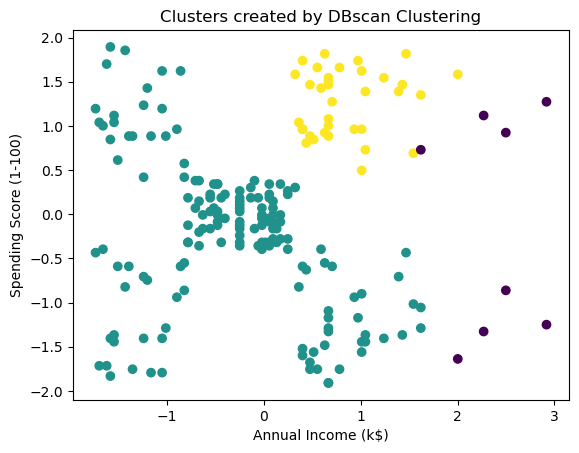

In [83]:
plt.scatter(df_customers[0], df_customers[1], c=df_customers['Cluster'], cmap='viridis')
plt.title('Clusters created by DBscan Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [85]:
cluster_mall.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [87]:
df_customers['Cluster'].value_counts()

Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64